<a href="https://colab.research.google.com/github/swb1113/CIND820/blob/main/CIND820.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Kaggle Dataset and Library Imports:**

In [ ]:
! pip install -q kaggle

ERROR: Operation cancelled by user


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/kaggle"

In [ ]:
%cd /content/gdrive/MyDrive/kaggle

/content/gdrive/MyDrive/kaggle


In [ ]:
!kaggle datasets download -d fedesoriano/heart-failure-prediction

  0% 0.00/8.56k [00:00<?, ?B/s]
100% 8.56k/8.56k [00:00<00:00, 1.45MB/s]


In [ ]:
!unzip \*.zip  && rm *.zip

Archive:  heart-failure-prediction.zip
replace heart.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
from sklearn.model_selection import cross_val_predict, train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression

# **Exploratory Data Analysis and Visualization:**

**Attribute Definitions:**

**Age**: age of the patient (years)

**Sex**: sex of the patient (M: Male, F: Female)

**ChestPainType**: chest pain type (TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic)

**RestingBP**: resting blood pressure (mm Hg)

**Cholesterol**: serum cholesterol (mm/dl)

**FastingBS**: fasting blood sugar (1: if FastingBS > 120 mg/dl, 0: otherwise)

**RestingECG**: resting electrocardiogram results (Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria)

**MaxHR**: maximum heart rate achieved (Numeric value between 60 and 202)

**ExerciseAngina**: exercise-induced angina (Y: Yes, N: No)

**Oldpeak**: oldpeak = ST (Numeric value measured in depression)

**ST_Slope**: the slope of the peak exercise ST segment (Up: upsloping, Flat: flat, Down: downsloping)

**HeartDisease**: output class (1: heart disease, 0: Normal)

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/kaggle/heart.csv")

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [ ]:
df.sample(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
688,76,F,NAP,140,197,0,ST,116,N,1.1,Flat,0
42,35,M,ATA,150,264,0,Normal,168,N,0.0,Up,0
857,53,F,ASY,130,264,0,LVH,143,N,0.4,Flat,0
270,45,M,ASY,120,225,0,Normal,140,N,0.0,Up,0
213,56,F,NAP,130,219,0,ST,164,N,0.0,Up,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
print("There are", df.shape[0], "observations and", df.shape[1], "attributes in the heart failure dataset.")

There are 918 observations and 12 attributes in the heart failure dataset.


**Descriptive Statistics of Numeric attributes**

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


FastingBS and HeartDisease are integer data types but are categorical attributes. Age, RestingBP, Cholesterol, and MaxHR may be close to normal distribution. However, more exploatory analysis will give a clearer picture.

In [ ]:
# changing data type of FastingBS to object
df['FastingBS'] =df['FastingBS'].astype("object")

**looking at categorical attribute data (except HeartDisease (for now))**

In [ ]:
df.describe(include=object).T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
FastingBS,918,2,0,704
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460


At initial glance, most of the patients in the dataset seem to be male (725 out of 918) and most patient's FastingBS is not over 120 mg/dl (704 out of 918).

**Checking for any missing/null values**

In [ ]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

There are no missing values in the dataset.

**HeartDisease (Target) Variable Exploratory Analysis:**

In [ ]:
df['HeartDisease'] = df['HeartDisease'].astype("object")
df['HeartDisease'].describe(include=object).T

count     918
unique      2
top         1
freq      508
Name: HeartDisease, dtype: int64

1    508
0    410
Name: HeartDisease, dtype: int64


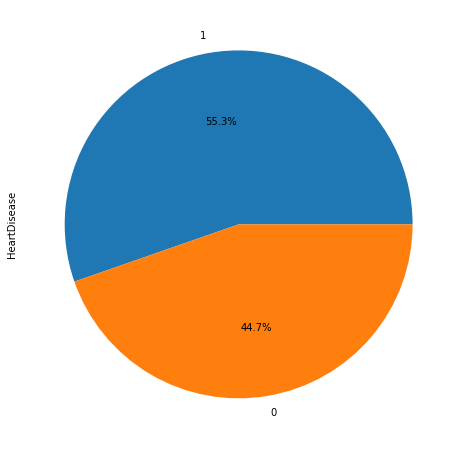

In [ ]:
print(df["HeartDisease"].value_counts(dropna = False))
df["HeartDisease"].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(8,8));

# 1 --> Heart Disease
# 0 --> Normal 

The dataset contains 508 (55.3%) of patients with heart disease and 410 (44.7%) of patients with no heart disease.

**Correlation Analysis:**

In [ ]:
df['HeartDisease'] = df['HeartDisease'].astype("int64")
px.imshow(df.corr(),title="Correlation Plot of Heart Failure Prediction",
          width=1000, height=500)

The Correlation plot indicates that heart disease has a negative correlation with max heartrate (-0.4) and a (weaker) negative correlation with cholesterol (-0.23). On the other hand, heart disease has a positive correlation with oldpeak (0.4), age (0.28), fastingbs (0.27), and restingbp (0.1). 

**Heart Disease in relation to Sex:**

In [ ]:
fig = px.histogram(df, 
                   x="HeartDisease",
                   color="Sex",
                   hover_data=df.columns,
                   title="Heart Disease Count Distinguished by Sex",
                   barmode="group",
                   width=1000, height=500)

fig.show()

In [ ]:
print(df["Sex"].value_counts(dropna = False))
fig=px.histogram(df,
                 x="Sex",
                 color="Sex",
                 hover_data=df.columns,
                 title="Sex count in the Dataset",
                 width=1000, height=500)
fig.show()

M    725
F    193
Name: Sex, dtype: int64


The plots show that a larger proportion of males in the dataset experienced heart disease opposed to females. 

percentage of males with heart disease = 63.2% (458/725)

percentage of females with heart disease = 25.9% (50/193)

There may be factors outside of "sex" that influence why males seem to be more affected by heart disease.



**Types of Chest Pain in Relation to Sex:**

In [ ]:
fig=px.histogram(df,
                 x="ChestPainType",
                 color="Sex",
                 hover_data=df.columns,
                 title="Types of Chest Pain Distinguished by Sex",
                 width=1000, height=500)
fig.show()

percentage of males experiencing chestpain (typical angina, atypical angina, or non-anginal pain) = (113 + 36 + 150)/725 = **41.2%**

percentage of females experiencing chestpain (typical angina, atypical angina, or non-anginal pain) = (60 + 10 + 53)/193 = **63.7%**


percentage of males asymptomatic = 426/725 = **58.8%**

percentage of females asymptomatic = 70/193 = **36.3%**

The plots indicate that while males are more likely to experience heart disease, they are less likely to experience (or report) chest pain than females. This may indicate that males are more likely to experience heart disease due to reluctance to report chest pain which may further develop into more complex heart disease. Therefore, there may be an under-reporting of male chest pain as males may tend to ignore their chest pains in contrast to females. However, more research and analysis must be performed to confirm the correlation between chest pain, heart disease and sex.   

**Brief look at Resting ECG, ExerciseAngina, and ST_Slope:**

In [ ]:
fig=px.histogram(df,
                 x="RestingECG",
                 hover_data=df.columns,
                 title="Distribution of Resting ECG",
                 width=1000, height=500)
fig.show()

In [ ]:
fig=px.histogram(df,
                 x="ExerciseAngina",
                 hover_data=df.columns,
                 title="Distribution of Exercise Angina",
                 width=1000, height=500)
fig.show()

In [ ]:
fig=px.histogram(df,
                 x="ST_Slope",
                 hover_data=df.columns,
                 title="Distribution of ST_Slope",
                 width=1000, height=500)
fig.show()

**Multiple Pairwise Bivariate Distributions:**

[]

<Figure size 1080x720 with 0 Axes>

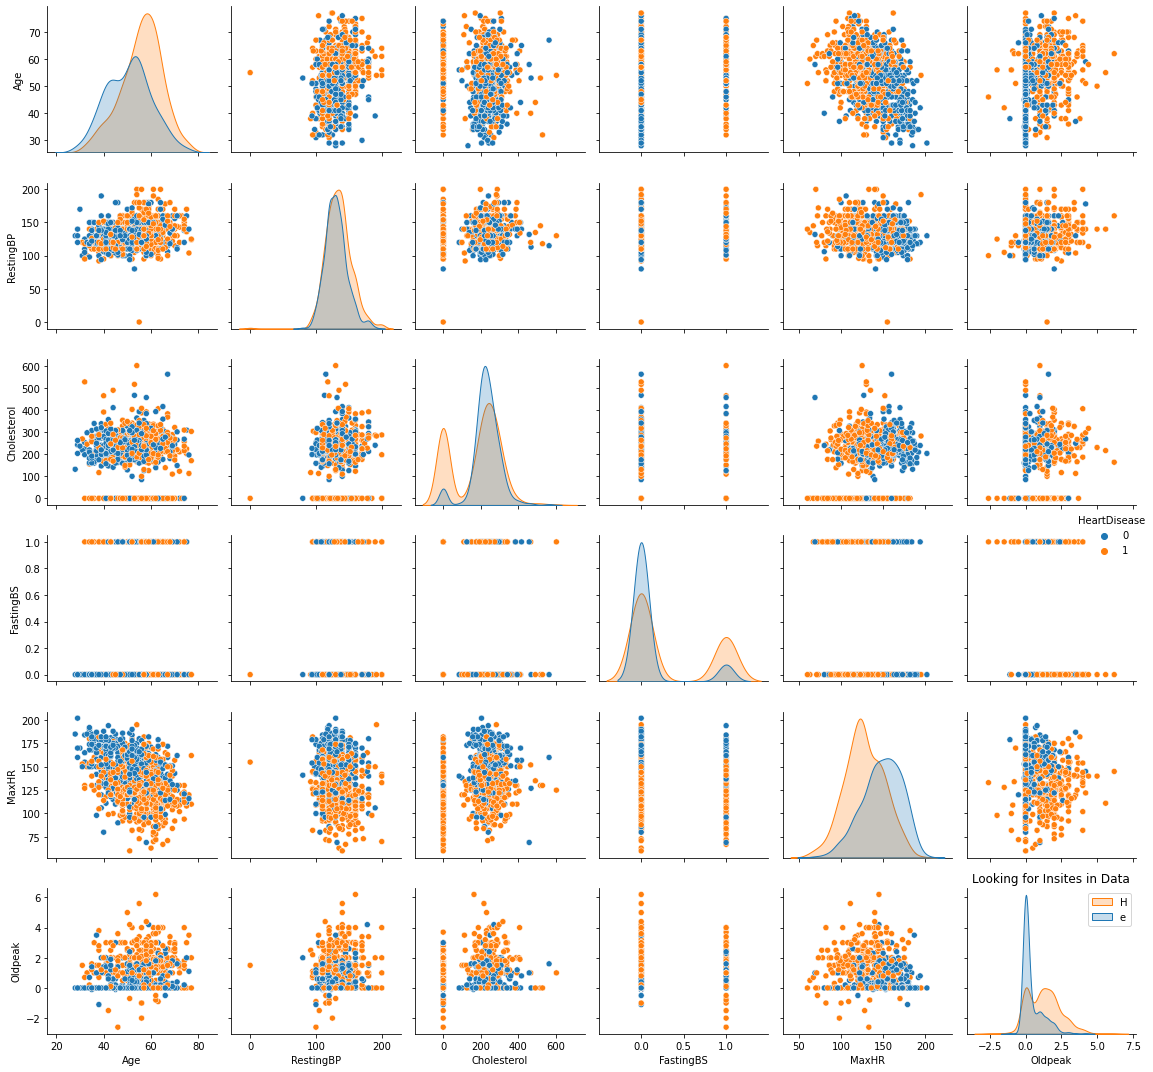

In [ ]:
plt.figure(figsize=(15,10))
sns.pairplot(df,hue="HeartDisease")
plt.title("Looking for Insites in Data")
plt.legend("HeartDisease")
plt.tight_layout()
plt.plot()


**DETAIL MY ANALYSIS**

**Skewness and Distribution Analysis:**

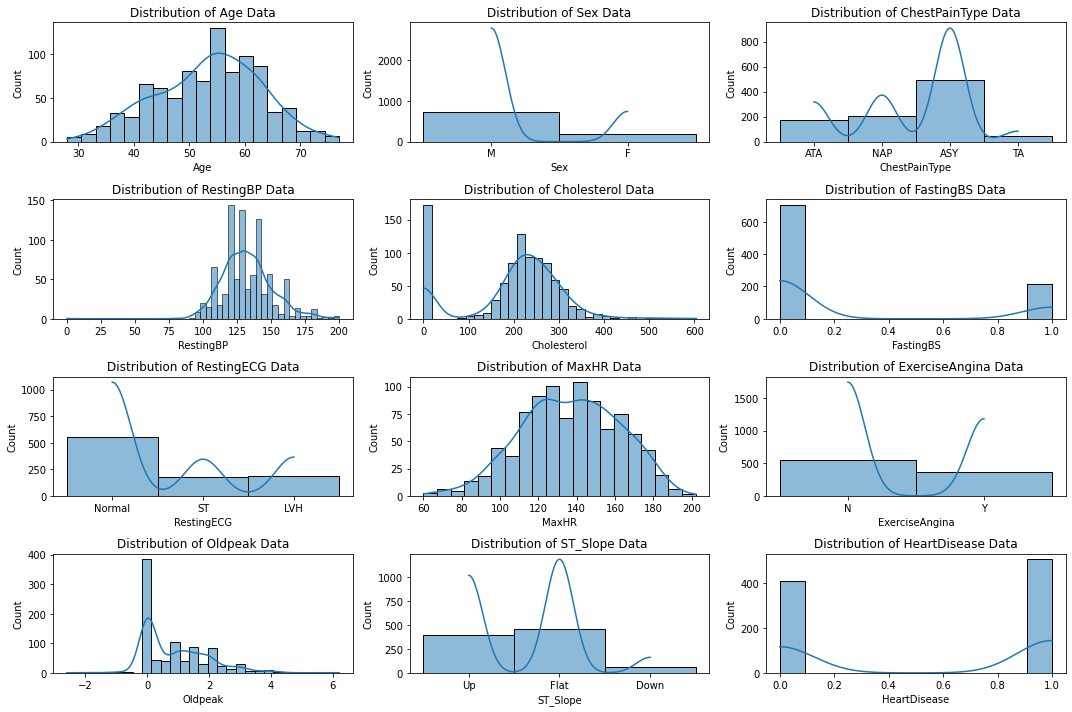

In [ ]:
#need to change up code a bit

plt.figure(figsize=(15,10))
for i,col in enumerate(df.columns,1):
    plt.subplot(4,3,i)
    plt.title(f"Distribution of {col} Data")
    sns.histplot(df[col],kde=True)
    plt.tight_layout()
    plt.plot()
    

**DETAIL MY ANALYSIS HERE**

**Outlier Analysis:**

In [ ]:
fig = px.box(df,
             y="Age",
             x="HeartDisease",
             title="Age Boxplot",
             width=1000, height=600)
fig.show()

In [ ]:
fig = px.box(df,y="RestingBP",
             x="HeartDisease",
             title="RestingBP Boxplot",
             width=1000, height=600)
fig.show()

In [ ]:
fig = px.box(df,
             y="Cholesterol",
             x="HeartDisease",
             title="Cholesterol Boxplot",
             width=1000, height=600)
fig.show()

In [ ]:
fig = px.box(df,
             y="Oldpeak",
             x="HeartDisease",
             title="Oldpeak Boxplot",
             width=1000, height=600)
fig.show()

In [ ]:
fig = px.box(df,
             y="MaxHR",
             x="HeartDisease",
             title="MaxHR Boxplot",
             width=1000, height=600)
fig.show()

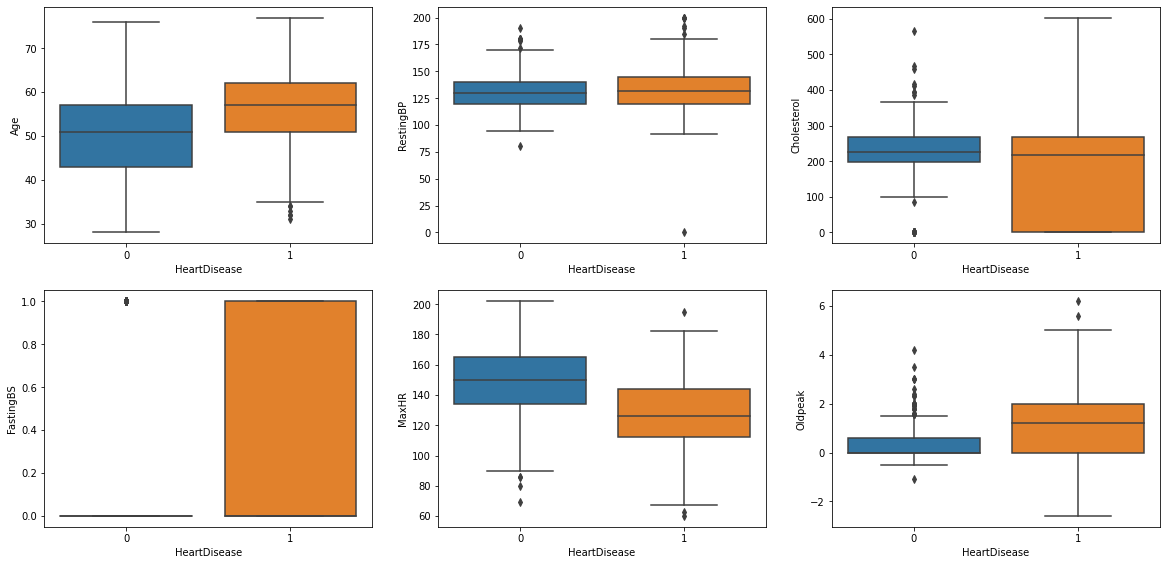

In [ ]:
numerical= df.drop(['HeartDisease'], axis=1).select_dtypes('number').columns

index = 0
plt.figure(figsize=(20,20))
for feature in numerical:
    if feature != "HeartDisease":
        index += 1
        plt.subplot(4, 3, index)
        sns.boxplot(x='HeartDisease', y=feature, data=df)

**Analysis of Boxplots:**

Most of the outliers tend to be concentrated in oldpeak and cholesterol with those with no heart disease. When looking at the dataset as a whole, outliers do not seem to pose a problem as they only compose a small percentage of the total data points. 



# **Train/Test Split:**

In [ ]:
X = df.drop(["HeartDisease"], axis=1)
y = df["HeartDisease"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify = y, random_state = 90)

# **Logistic Regression Model:**